#### ECS764P - Submission 2

### Q1

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas_datareader as pdr
from scipy.stats import beta, kurtosis, logistic, cauchy, laplace, norm
from scipy import integrate

In [3]:
def beta_measure(a, b):
    
    b_m = beta.cdf(b, 3, 7) - beta.cdf(a, 3, 7)
    
    return b_m

In [4]:
print("Beta_measure(0, 1) : {}".format(beta_measure(0,1)))
print("Beta_measure(0, 0) : {}".format(beta_measure(0,0)))
print("Beta_measure(0.25,0.75) : {}".format(beta_measure(0.25,0.75)))
print("Beta_measure(0,0.5) : {}".format(beta_measure(0,0.5)))
print("Beta_measure(0.5,1) : {}".format(beta_measure(0.5,1)))

Beta_measure(0, 1) : 1.0
Beta_measure(0, 0) : 0.0
Beta_measure(0.25,0.75) : 0.599334716796875
Beta_measure(0,0.5) : 0.91015625
Beta_measure(0.5,1) : 0.08984375


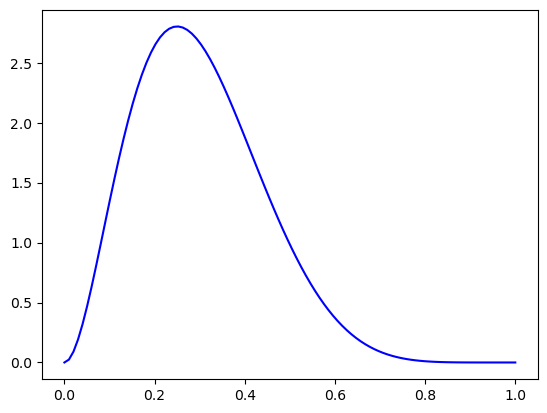

In [5]:
x = np.linspace(0,1,100) # X values

y = beta.pdf(x, 3, 7)
    
plt.plot(x,y, 'b')
plt.show()

### Q2

In [6]:
def beta_pdf(x):

    y = beta.pdf(x, 3, 7)
      
    return y

def int_quad(a, b):
    x_a = lambda x: beta_pdf(x)
    y_a = integrate.quad(x_a, a, b)
    
    return y_a


In [7]:
print("Integral of Beta_pdf(0, 1) : {}".format(int_quad(0,1)[0]))
print("Integral of Beta_pdf(0, 0) : {}".format(int_quad(0,0)[0]))
print("Integral of Beta_pdf(0.25,0.75) : {}".format(int_quad(0.25,0.75)[0]))
print("Integral of Beta_pdf(0,0.5) : {}".format(int_quad(0,0.5)[0]))
print("Integral of Beta_pdf(0.5, ∞) : {}".format(int_quad(0.5,np.inf)[0]))

Integral of Beta_pdf(0, 1) : 1.0
Integral of Beta_pdf(0, 0) : 0.0
Integral of Beta_pdf(0.25,0.75) : 0.5993347167968751
Integral of Beta_pdf(0,0.5) : 0.9101562499999999
Integral of Beta_pdf(0.5, ∞) : 0.08984374999997065


##### The integrals of the pdf of the probability measure Beta (3, 7) evaluated at different intervals are the same as its cdf taken over the same interval. 

### Q3

##### 1.) Support of Beta (3, 7) = [0 , 1]
##### 2.) Support of Beta (7, 3) = [0 , 1]
##### 3.) Support of Beta (3, 7) + Beta (7, 3) = [0 , 2]

In [8]:
def sum_densities(x, t):
    f1 = beta.pdf(x, 3, 7)
    
    f2 = beta.pdf((t-x), 7, 3)
    
    prod_f = f1 * f2
    
    return prod_f

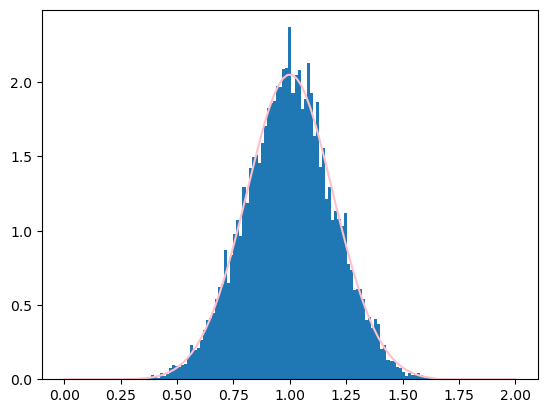

In [9]:
# Generating t1 - t100, and integrating the 2 beta densities product
t = np.linspace(0,2,100)
y_t = []

for i in t:
    x_t = lambda x, i: sum_densities(x, i)
    y_a = integrate.quad(x_t, -np.inf, np.inf, args=(i,))
    y_t.append(y_a[0])

plt.plot(t,y_t, 'pink')

# Generating 10000 samples
N = 10000
seed = 42

s1 = beta.rvs(3, 7, size = N, random_state = seed)
# Check out what happens if both sets of samples are seeded in the same way by removing the + 1. Why?
s2 = beta.rvs(7, 3, size = N, random_state = seed + 1)

m = s1 + s2

plt.hist(m,bins = 100, density = True, label = 'sum of uniform samples')

plt.show()

#### The histogram of the sums and the plot of the convolution of the two pdfs have a great fit. 

### Q4

In [10]:
my_data = pdr.DataReader('MSFT', 'yahoo', '2012-11-02', '2022-11-02')

In [11]:
my_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-11-02,29.770000,29.330000,29.590000,29.500000,57131600.0,24.194626
2012-11-05,29.740000,29.330000,29.620001,29.629999,38070800.0,24.301233
2012-11-06,30.200001,29.610001,29.820000,29.860001,43401500.0,24.489876
2012-11-07,29.830000,29.049999,29.530001,29.080000,57871800.0,23.850157
2012-11-08,29.370001,28.799999,29.120001,28.809999,49841800.0,23.628710


In [12]:
df = my_data[["Close"]].rename(columns={"Close": "Close_t1"})
df["Close_t"] = df["Close_t1"].shift(1)

In [13]:
df = df.dropna()
df.head()

,Close_t1,Close_t
Date,,
2012-11-05,29.629999,29.500000
2012-11-06,29.860001,29.629999
2012-11-07,29.080000,29.860001
2012-11-08,28.809999,29.080000
2012-11-09,28.830000,28.809999


In [14]:
return_t = 100 * ((df["Close_t1"] / df["Close_t"]) - 1)
r_array = return_t.to_numpy()
r_array

array([ 0.44067512,  0.77624521, -2.61219247, ..., -1.58561509,
       -1.70594349, -3.53683312])

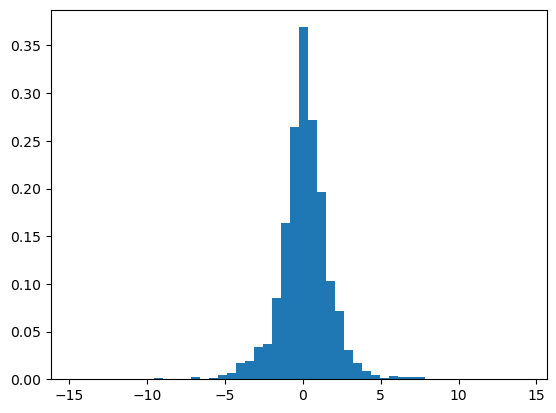

In [15]:
plt.hist(r_array, bins = 50, density = True)
plt.show()

In [16]:
k = kurtosis(r_array)
k

8.807800316907603

#### Notes from Distribution
##### 1.) Distribution Support is [-15 , 15], as such, the family of distribution best to model this data is the DISCRETE DISTRIBUTIONS SUPPORTED BY -infinity to infinity
##### 2.) Distribution is Leptokurtic and symmetric and could be Cauchy, Laplace or Logistic from this family of distribution

In [17]:
#l_f =
x_0, g = cauchy.fit(r_array)
x_0, g

(0.08342637969568584, 0.7489504311877502)

In [18]:
# k_f = 
mu, s = logistic.fit(r_array)
mu, s

(0.10186681301612609, 0.838705527407172)

In [19]:
# la_f

mu_l, b = laplace.fit(r_array)
mu_l, b

(0.07165654349059469, 1.1466747774881987)

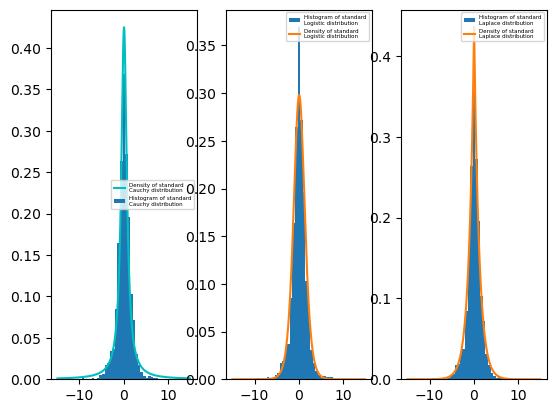

In [20]:
x_r = np.linspace(-15,15,10000)
y_r = cauchy.pdf(x_r, loc = x_0, scale = g)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(x_r,y_r, "c", label="Density of standard\nCauchy distribution")
ax1.hist(r_array, bins = 50, density = True, label="Histogram of standard\nCauchy distribution")
ax1.legend(fontsize=4)

x_rl = np.linspace(-15,15,10000)
y_rl = logistic.pdf(x_rl, loc = mu, scale = s)

ax2.hist(r_array, bins = 50, density = True, label="Histogram of standard\nLogistic distribution")
ax2.plot(x_rl,y_rl, label="Density of standard\nLogistic distribution")
ax2.legend(fontsize=4)

x_rla = np.linspace(-15,15,10000)
y_rla = laplace.pdf(x_rla, loc = mu_l, scale = b)

ax3.hist(r_array, bins = 50, density = True, label="Histogram of standard\nLaplace distribution")
ax3.plot(x_rla,y_rla, label="Density of standard\nLaplace distribution")
ax3.legend(fontsize=4)

plt.show;

##### Comparing the fit of the three distributions show that Laplace and Cauchy distributions have a better fit than Logistic distribution, and Laplace has a bit of a better fit than Cauchy

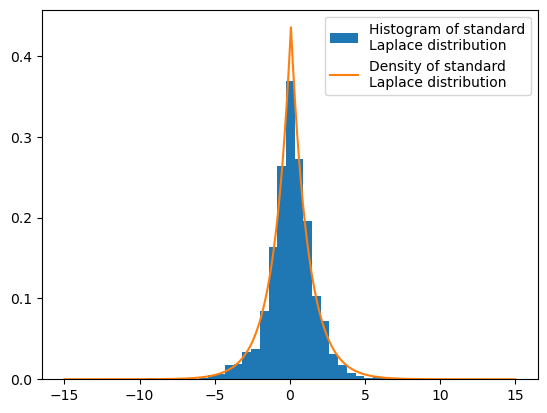

In [21]:
# Clearer plot of the Laplace distribution fit

plt.hist(r_array, bins = 50, density = True, label="Histogram of standard\nLaplace distribution")
plt.plot(x_rla,y_rla, label="Density of standard\nLaplace distribution")
plt.legend(fontsize=10)

plt.show();

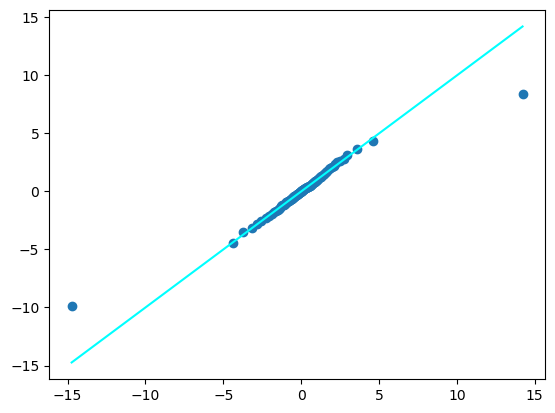

In [22]:
x1 = r_array
xx = laplace.rvs(loc = mu_l, scale = b, size = len(r_array), random_state = 50)

p = np.linspace(0,100,100)

y1 = np.percentile(x1, p)
yy = np.percentile(xx, p)
plt.plot(y1,yy, 'o')
plt.plot(y1,y1, color='cyan');

##### The QQ plot shows that the 2 distributions have the same skew and are both symmetric because the scatter plot is straight lined and not an S shape.
##### Also, the little deviation at the ends shows the daily returns distribution has similar tails with the Laplace distribution and is a perfect fit.